In [1]:
print("Hello World!")

Hello World!


In [2]:
from numpy.random import seed
seed(1)

from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

Using TensorFlow backend.


In [2]:
# fit MLP to dataset and print error
def fit_model(X, y):
    
    # design network
    model = Sequential()
    model.add(Dense(10, input_dim=1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # fit network
    model.fit(X, y, epochs=100, batch_size=len(X), verbose=0)
    
    # forecast
    yhat = model.predict(X, verbose=0)
    loss = mean_squared_error(y, yhat[:,0])
    print(loss)
    return loss

In [3]:
# create sequence
length = 100
sequence = [i/float(length) for i in range(length)]
# create X/y pairs
df = DataFrame(sequence)
df = concat([df.shift(1), df], axis=1)
df.dropna(inplace=True)
# convert to MLP friendly format
values = df.values
X, y = values[:,0], values[:,1]
X.shape, y.shape

((99,), (99,))

In [10]:
# repeat experiment
repeats = 15

vals = []
for _ in range(repeats):
    loss = fit_model(X, y)
    vals.append(loss)
    
vals = np.array(vals)
print(vals.shape)

0.20504675932589295
0.0035844285690576874
0.03778201311249263
0.005331703756795706
3.98544413026156e-06
0.028832257424588736
0.08043158979278815
0.0020255502861990364
0.002352213185761803
0.006751705834386256
0.0038943752735889616
0.001324593520886964
0.1885007621293925
1.718670880108647e-07
0.2431189295010302
(15,)


In [9]:
mean = np.mean(vals)
std = np.std(vals)

print(mean, std)

0.01546660582754107 0.015497887491323659


### Manual validation

In [1]:
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [2]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)

In [3]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 575us/step - loss: 4.6352 - accuracy: 0.5798 - val_loss: 1.3942 - val_accuracy: 0.5157
Epoch 2/150
514/514 [==============================] - 0s 175us/step - loss: 1.2285 - accuracy: 0.5467 - val_loss: 0.9711 - val_accuracy: 0.5748
Epoch 3/150
514/514 [==============================] - 0s 180us/step - loss: 0.8792 - accuracy: 0.6070 - val_loss: 0.8189 - val_accuracy: 0.6024
Epoch 4/150
514/514 [==============================] - 0s 178us/step - loss: 0.8062 - accuracy: 0.5914 - val_loss: 0.7494 - val_accuracy: 0.6260
Epoch 5/150
514/514 [==============================] - 0s 181us/step - loss: 0.7094 - accuracy: 0.6576 - val_loss: 0.7278 - val_accuracy: 0.6378
Epoch 6/150
514/514 [==============================] - 0s 188us/step - loss: 0.7241 - accuracy: 0.6265 - val_loss: 0.7183 - val_accuracy: 0.6496
Epoch 7/150
514/514 [==============================] - 0s 181us/step - loss: 0.6911 

In [3]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
X.shape, Y.shape

((768, 8), (768,))

In [5]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    
def train_model(model):
    # Fit the model
    model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)

In [6]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold

StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

In [5]:
cvscores = []
for train, test in kfold.split(X, Y):
    # Create
    model = create_model()
    
    # Train
    train_model(model)
    
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 80.52%
accuracy: 79.22%
accuracy: 72.73%
accuracy: 66.23%
accuracy: 70.13%
accuracy: 70.13%
accuracy: 76.62%
accuracy: 74.03%
accuracy: 71.05%
accuracy: 73.68%
73.43% (+/- 4.17%)


In [9]:
#72.53% (+/- 3.46%)


In [7]:
from __future__ import print_function
import numpy as np
import time
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from sklearn.model_selection import StratifiedKFold

In [8]:
# hyperparams
batch_size = 32
num_classes = 10
epochs = 10


# input image dimensions
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

In [9]:
def load_data():
    
    # load your data using this function  
    
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # normalize
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    
    return x_train, y_train
    
    
def create_model():
    
    # create your model using this function
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=input_shape))
    
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model


def train_and_evaluate_model(model, x_train_cv, y_train_cv, x_val_cv, y_val_cv):
    
    # fit and evaluate here.
    
    # convert class vectors to binary class matrices
    y_train_cv = keras.utils.to_categorical(y_train_cv, num_classes)
    y_val_cv = keras.utils.to_categorical(y_val_cv, num_classes)
    
    model.fit(x_train_cv,y_train_cv,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val_cv, y_val_cv))
    
    score = model.evaluate(x_val_cv, y_val_cv, verbose=0)
    loss, acc = score[0], score[1]
    
    return acc

In [10]:
# Save model and weights
#if not os.path.isdir(save_dir):
#    os.makedirs(save_dir)
#model_path = os.path.join(save_dir, model_name)
#model.save(model_path)
#print('Saved trained model at %s ' % model_path)

# Score trained model.
#scores = model.evaluate(x_test, y_test, verbose=1)
#print('Test loss:', scores[0])
#print('Test accuracy:', scores[1])

In [11]:
n_folds = 10

data, labels = load_data()
print(data.shape, labels.shape)

# define 10-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
print(kfold)

(50000, 32, 32, 3) (50000, 1)
StratifiedKFold(n_splits=5, random_state=0, shuffle=True)


In [12]:
for i, (train, test) in enumerate(kfold.split(data, labels)):
    print(train[:10], test[:10])
    print("Fold - {}".format(i), data[train].shape, labels[train].shape, data[test].shape, labels[test].shape)

[ 3  4  5  6  7  8  9 10 11 12] [ 0  1  2 14 17 21 24 25 33 41]
Fold - 0 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)
[ 0  1  2  3  4  5  6  7  9 12] [ 8 10 11 27 31 36 44 47 51 53]
Fold - 1 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)
[ 0  1  2  3  4  5  7  8  9 10] [ 6 28 29 35 38 43 45 46 49 54]
Fold - 2 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)
[ 0  1  2  6  7  8 10 11 12 14] [ 3  4  5  9 13 15 19 20 30 39]
Fold - 3 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)
[ 0  1  2  3  4  5  6  8  9 10] [ 7 12 16 18 22 23 26 32 34 37]
Fold - 4 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)


In [51]:
indices=list(range(len(data)))
#np.random.seed(42)
np.random.shuffle(indices)
print(indices[:10])


ind=int(len(indices)*0.80)
print(ind)



train_index = indices[:ind]
print(len(train_index))
print(train_index[:10])

test = indices[-(len(indices)-ind):]
print(len(test))
print(test[:10])

[26274, 12256, 2818, 3008, 1217, 11330, 4287, 19905, 1284, 45482]
40000
40000
[26274, 12256, 2818, 3008, 1217, 11330, 4287, 19905, 1284, 45482]
10000
[37040, 7378, 37157, 47567, 3004, 49861, 8045, 29036, 44466, 24734]


In [46]:
# Manual cross validation!!!!!!!!!!

for i in range(5):
    indices=list(range(len(data)))
    np.random.shuffle(indices)
    ind=int(len(indices)*0.80)
    train = indices[:ind]
    test = indices[-(len(indices)-ind):]
    print("Fold - {}".format(i), data[train].shape, labels[train].shape, data[test].shape, labels[test].shape)

Fold - 0 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)
Fold - 1 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)
Fold - 2 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)
Fold - 3 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)
Fold - 4 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)


In [6]:
cross_val_scores = []

for i, (train, test) in enumerate(kfold.split(data, labels)):
    
    print("Fold - {}".format(i), data[train].shape, labels[train].shape, data[test].shape, labels[test].shape)
    
    model = None # Clearing the NN.
    
    # Calculate the starting time    
    start_time = time.time()
    
    model = create_model()
    
    acc = train_and_evaluate_model(model, data[train], labels[train], data[test], labels[test])
    
    end_time = time.time()
    print("--- Time taken to train : %s hours ---" % ((end_time - start_time)//3600))
    
    cross_val_scores.append(acc)

Fold - 0 (40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1)
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 8s 209us/step - loss: 1.8891 - accuracy: 0.3082 - val_loss: 1.5883 - val_accuracy: 0.4273
Epoch 2/10
40000/40000 [==============================] - 8s 195us/step - loss: 1.5552 - accuracy: 0.4321 - val_loss: 1.4067 - val_accuracy: 0.4971
Epoch 3/10
40000/40000 [==============================] - 8s 202us/step - loss: 1.4240 - accuracy: 0.4880 - val_loss: 1.2968 - val_accuracy: 0.5351
Epoch 4/10
40000/40000 [==============================] - 8s 212us/step - loss: 1.3311 - accuracy: 0.5222 - val_loss: 1.2311 - val_accuracy: 0.5657
Epoch 5/10
40000/40000 [==============================] - 7s 186us/step - loss: 1.2504 - accuracy: 0.5570 - val_loss: 1.1721 - val_accuracy: 0.5863
Epoch 6/10
40000/40000 [==============================] - 9s 225us/step - loss: 1.1818 - accuracy: 0.5791 - val_loss: 1.0790 - val_accuracy: 

In [9]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cross_val_scores), np.std(cross_val_scores)))

0.67% (+/- 0.01%)


In [10]:
np.mean(cross_val_scores), np.std(cross_val_scores)

(0.6676400065422058, 0.00709722075734607)

Automatically created module for IPython interactive environment


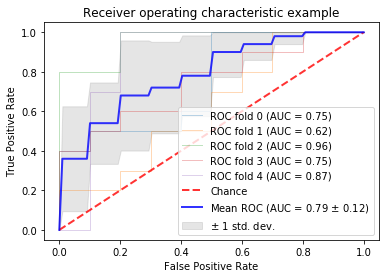

In [11]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()